In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import os
import cv2
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt

In [25]:
def load_images_from_folder(folder):
    #folder = "/content/drive/MyDrive/DIAIDeepLearningAssignment2/data_assign_2/images_retreival_local_database"
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append((filename, img))
    return images

In [26]:
def extract_features(model, img):
    img = cv2.resize(img, (224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = model.predict(img)
    return features.flatten()

In [28]:
def image_retrieval(query_image_path, database_folder, top_n=4):
    #query_image_path = "/content/drive/MyDrive/DIAIDeepLearningAssignment2/data_assign_2/query_images"
    #database_folder = "/content/drive/MyDrive/DIAIDeepLearningAssignment2/data_assign_2/images_retreival_local_database"
    # Load pre-trained VGG16 model
    model = VGG16(weights='imagenet', include_top=False)

    # Load query image
    query_img = cv2.imread(query_image_path)
    plt.imshow(query_img)
    plt.show()
    query_features = extract_features(model, query_img)

    # Load images from the database folder
    database_images = load_images_from_folder(database_folder)

     # Calculate Euclidean distances
    distances = []
    for filename, img in database_images:
        img_features = extract_features(model, img)
        distance = euclidean_distances([query_features], [img_features])[0][0]
        distances.append((filename, distance))

        # Sort images based on distances
    distances.sort(key=lambda x: x[1])

    # Display top N similar images
    print(f"Top {top_n} Similar Images:")
    for i in range(top_n):
        print(f"{i + 1}. {distances[i][0]} (Distance: {distances[i][1]:.2f})")
        image_file = distances[i][0]
        image_path = f"/content/drive/MyDrive/DIAIDeepLearningAssignment2/data_assign_2/images_retreival_local_database/{image_file}"
        database_image = plt.imread(image_path)
        plt.imshow(database_image)
        plt.show()

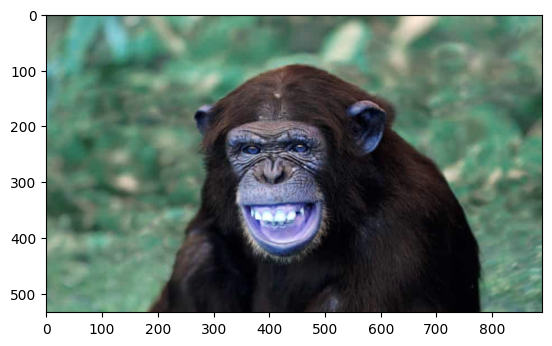

1/1 [==============================] - 1s 552ms/step
Top 4 Similar Images:
1. 11fe61ae70.jpg (Distance: 667.85)


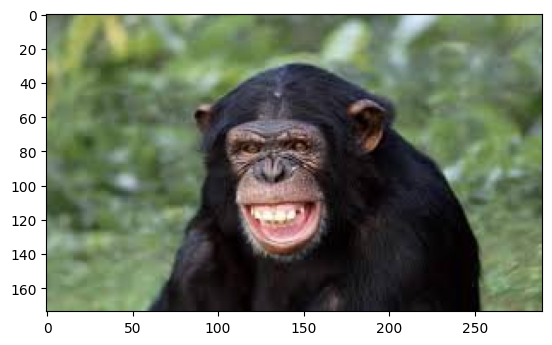

2. 47c9b0d085.jpg (Distance: 2194.15)


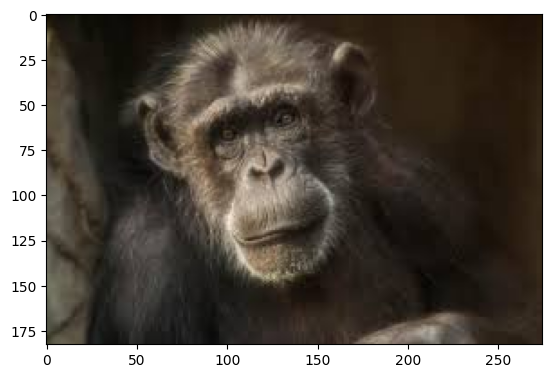

3. 39e16108e1.jpg (Distance: 2304.10)


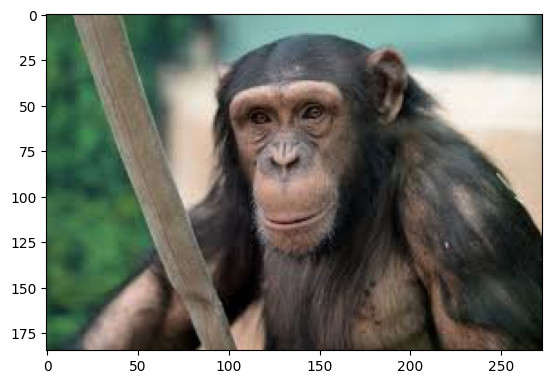

4. 6b69e9e2cd.jpg (Distance: 2369.72)


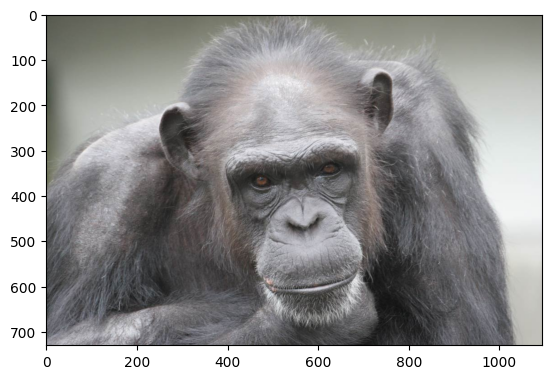

In [37]:
if __name__ == "__main__":
    # Specify the paths to the query image and the database folder
    query_image_path = "/content/drive/MyDrive/DIAIDeepLearningAssignment2/data_assign_2/query_images/0b30d5c395.jpg"
    database_folder = "/content/drive/MyDrive/DIAIDeepLearningAssignment2/data_assign_2/images_retreival_local_database"

    # Run image retrieval
    image_retrieval(query_image_path, database_folder)